<a href="https://colab.research.google.com/github/csabiu/Astrostatistics/blob/main/Genetic_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from scipy.optimize import differential_evolution, Bounds

In [2]:
from astropy.cosmology import LambdaCDM, FlatLambdaCDM
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Math, Latex

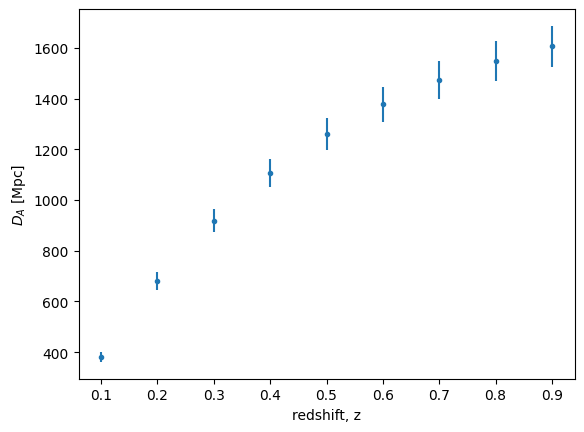

In [12]:
cosmo1=FlatLambdaCDM(H0=70, Om0=0.3)
z=np.arange(0.1,1,0.1)
da_data=cosmo1.angular_diameter_distance(z).value
da_err=0.05*da_data

plt.errorbar(z,da_data,yerr=da_err,fmt='.')
plt.xlabel('redshift, z')
plt.ylabel(r'$D_A$ [Mpc]')

global da_err, da_data

In [19]:
def fitness(x):
    """
    Using chi2 as a fitness measure
    """
    Om = x[0]
    H0 = x[1] # unpack the parameters

    cosmo_Om_p=FlatLambdaCDM(H0=H0, Om0=Om)
    da_model_Om_p=cosmo_Om_p.angular_diameter_distance(z).value
    chisq=np.sum((da_data-da_model_Om_p)**2/da_err**2)

    return chisq

In [6]:
bounds = Bounds([0.1, 0.5], [50., 100.])

In [23]:
result = differential_evolution(fitness, bounds,  popsize=20, mutation=0.2,recombination=0.4)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentialevolution.py:1165: ComplexWarning: Casting complex values to real discards the imaginary part
  energies[0:S] = calc_energies
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_differentialevolution.py:1418: ComplexWarning: Casting complex values to real discards the imaginary part
  self.population_energies[candidate] = np.squeeze(energy)


In [42]:
from IPython.display import display, Math
labelss=['\Omega_M','H_0']
for i in range(2):
    txt = "\mathrm{{{0}}} = {1:.3f}"
    txt = txt.format(labelss[i], result.x[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>